In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [64]:
import pandas as pd
df = pd.read_csv("data.csv")

df.head(500)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2222284,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161331,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543090,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222856,2006
4,tt5152226,Tree of Life,Drama,9.4,11606,2014
...,...,...,...,...,...,...
495,tt12327578,Star Trek: Strange New Worlds,"Action, Adventure, Sci-Fi",8.3,61670,2022
496,tt0445114,Extras,"Comedy, Drama",8.3,61128,2005
497,tt1344204,Blue Mountain State,"Comedy, Sport",8.3,59895,2010
498,tt18335752,1923,"Drama, Western",8.3,58453,2022


In [65]:
df.shape

(1000, 6)

In [66]:
df.dtypes

id                object
title             object
genres            object
averageRating    float64
numVotes           int64
releaseYear        int64
dtype: object

In [67]:
df.columns

Index(['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear'], dtype='object')

In [68]:
df.isnull().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

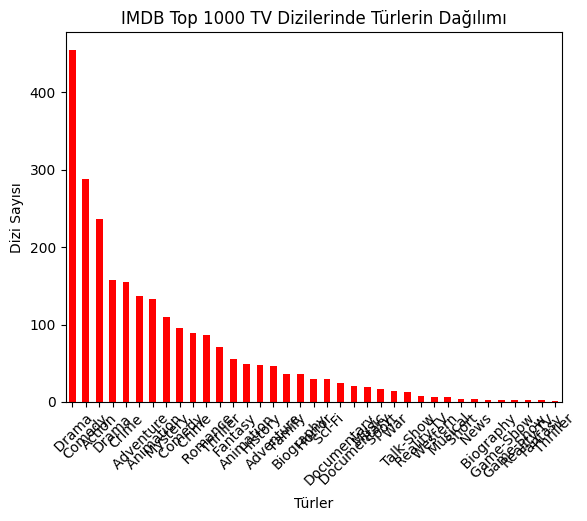

In [69]:
genres_series = df['genres'].str.split(',').explode()
genres_series.value_counts().plot(kind='bar', color='red')
plt.title('IMDB Top 1000 TV Dizilerinde Türlerin Dağılımı')
plt.xlabel('Türler')
plt.ylabel('Dizi Sayısı')
plt.xticks(rotation=45)
plt.show()

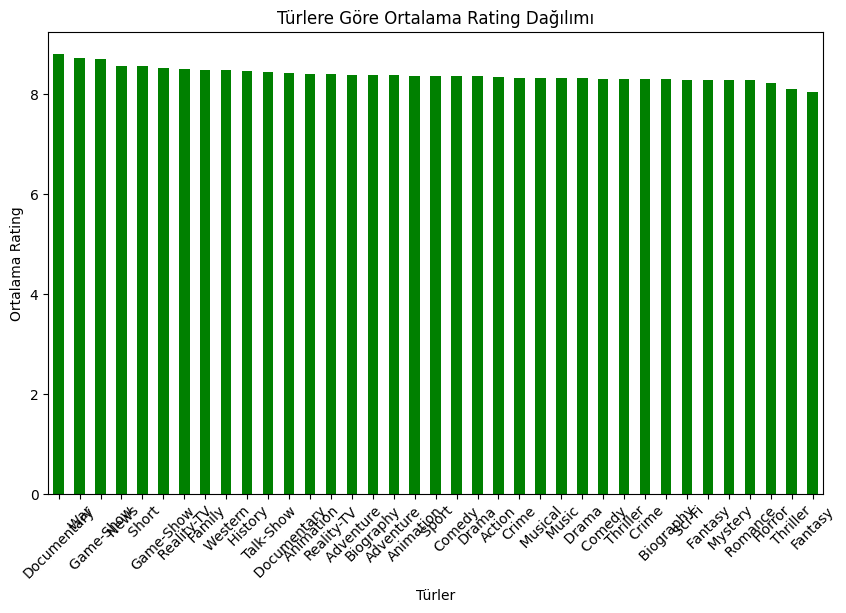

In [70]:
df_genres = df[['genres', 'averageRating']].copy() 
df_genres_exploded = df_genres.assign(genres=df_genres['genres'].str.split(',')).explode('genres') 

genre_ratings = df_genres_exploded.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_ratings.plot(kind='bar', color='green')
plt.title('Türlere Göre Ortalama Rating Dağılımı')
plt.xlabel('Türler')
plt.ylabel('Ortalama Rating')
plt.xticks(rotation=45)
plt.show()


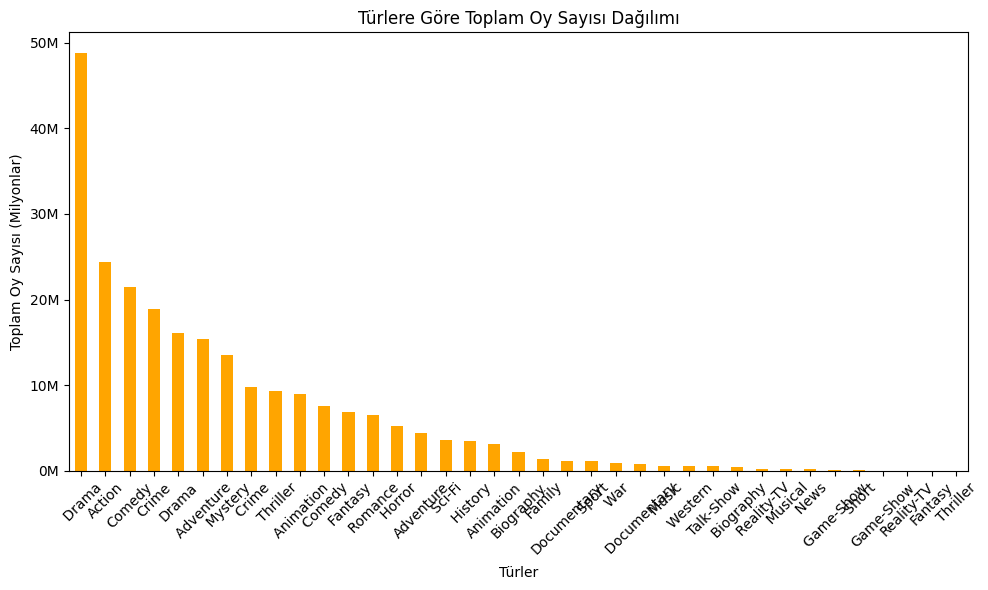

In [71]:
import matplotlib.ticker as ticker
df_genres = df[['genres', 'numVotes']].copy() 
df_genres_exploded = df_genres.assign(genres=df_genres['genres'].str.split(',')).explode('genres') 

genre_votes = df_genres_exploded.groupby('genres')['numVotes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = genre_votes.plot(kind='bar', color='orange')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))  # Oyları milyonlar halinde göster
plt.title('Türlere Göre Toplam Oy Sayısı Dağılımı')
plt.xlabel('Türler')
plt.ylabel('Toplam Oy Sayısı (Milyonlar)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



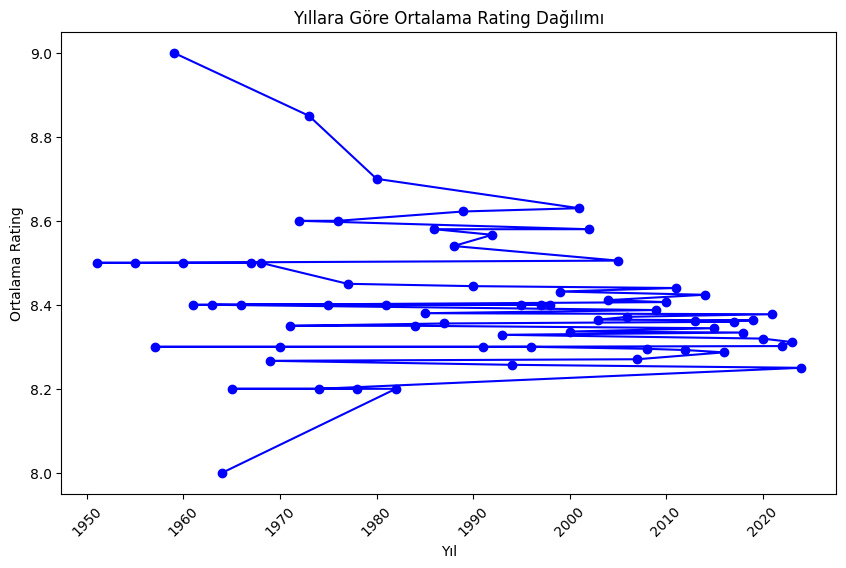

In [72]:

df_year_rating = df[['releaseYear', 'averageRating']]

year_ratings = df_year_rating.groupby('releaseYear')['averageRating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
year_ratings.plot(kind='line', marker='o', color='blue')
plt.title('Yıllara Göre Ortalama Rating Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Rating')
plt.xticks(rotation=45)
plt.show()
